In [44]:
import os
import sys

sys.path.append('../1_dock')
from shared_paths import shared_paths

sys.path.append('../3_analyze')
from containers import Dataset
from statistics import Statistics

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
prots = os.listdir('../../data')
prots.remove('process_prog.sh')
prots.remove('M3')
prots

['GCR',
 'BRAF',
 'DTRANSP',
 'AR',
 'MEK1',
 '5HT2B',
 'CDK2',
 'SIGMA1',
 'JAK2',
 'ERA',
 'PLK1',
 'VITD',
 'GLUT1',
 'MGLUR5',
 'STRANSP',
 'B2AR',
 'TRPV1',
 'MR',
 'B1AR',
 'CHK1']

In [18]:
data = Dataset(shared_paths, prots)

In [20]:
for prot_name, protein in data.proteins.items():
    print prot_name, len(protein.lm.pdb)

B2AR 8
GLUT1 3
5HT2B 2
PLK1 12
TRPV1 2
CDK2 287
CHK1 102
MGLUR5 5
MEK1 24
GCR 18
JAK2 55
BRAF 26
MR 17
DTRANSP 9
STRANSP 5
VITD 37
SIGMA1 2
B1AR 12
AR 21
ERA 199


In [63]:
k_list = ['hbond', 'hbond','sb1','pipi','contact', 'mcss']
num_ligs = 10

In [64]:
structs = {prot_name: protein.lm.st  for prot_name, protein in data.proteins.items()}
ligands = {prot_name: protein.lm.docked(protein.lm.pdb)[:10] for prot_name, protein in data.proteins.items()}
alls = Statistics(ligands, structs, k_list)
data_dir='/scratch/PI/rondror/jpaggi/combind/data'
stats_dir = 'stats3'
alls.read(data_dir, stats_dir)

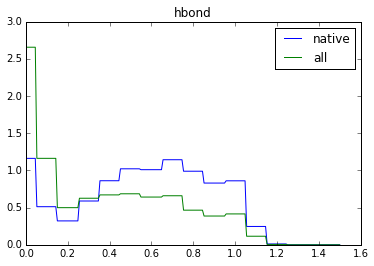

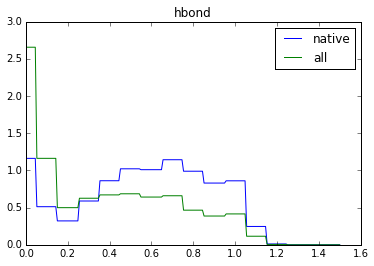

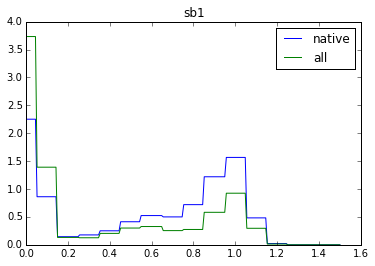

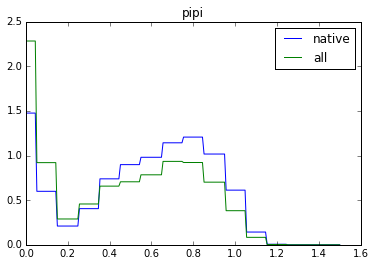

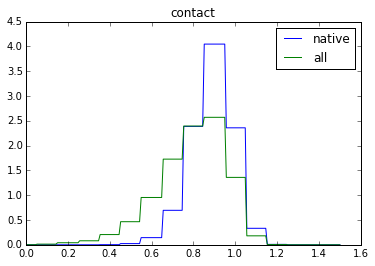

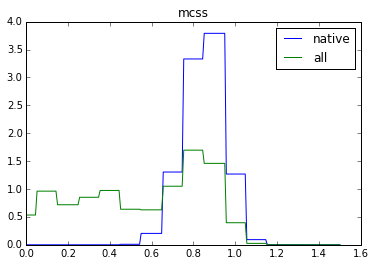

In [65]:
for k in k_list:
    x = np.linspace(0, 1.5, 200)
    plt.title(k)
    plt.plot(x, [alls.dist[native][k].evaluate(i) for i in x], label='native')
    plt.plot(x, [alls.dist[allposes][k].evaluate(i) for i in x], label='all')
    plt.legend()
    plt.show()

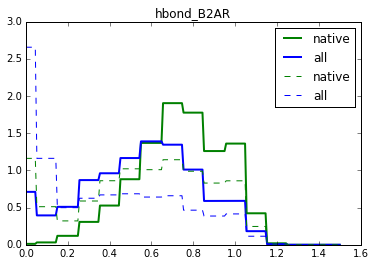

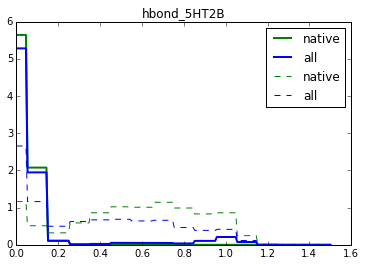

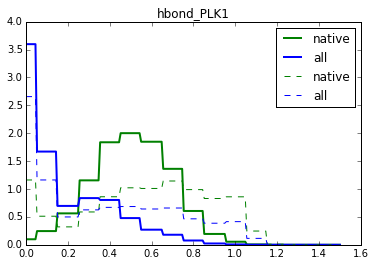

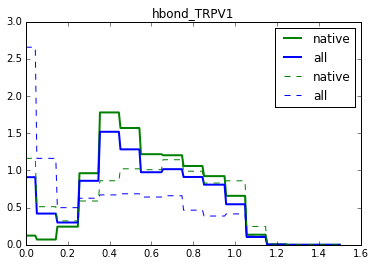

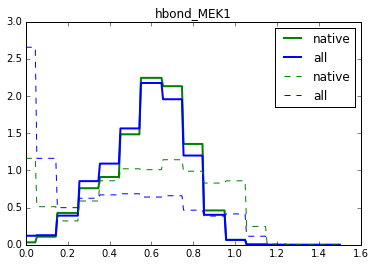

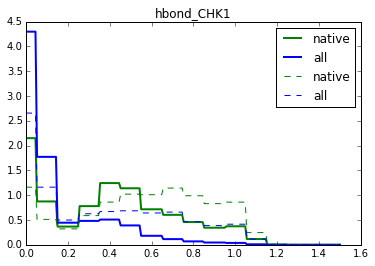

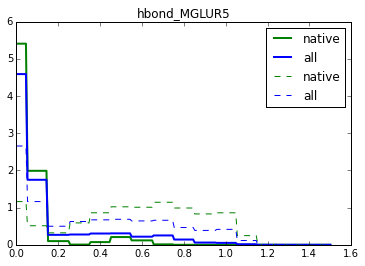

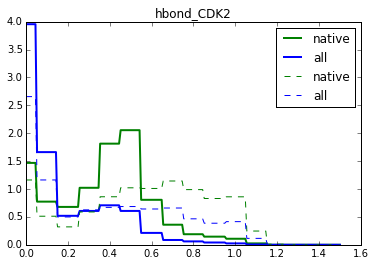

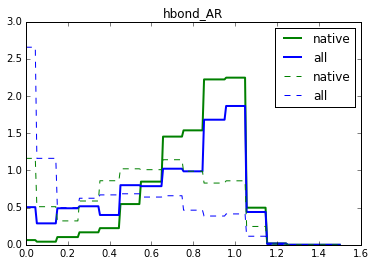

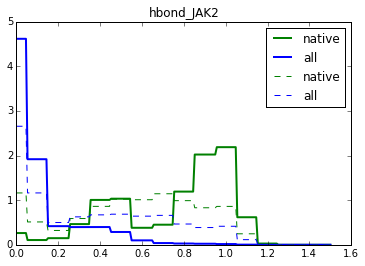

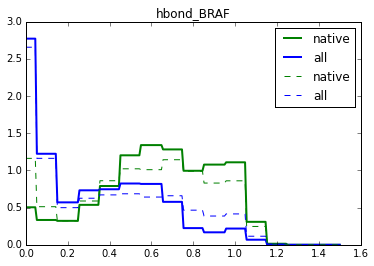

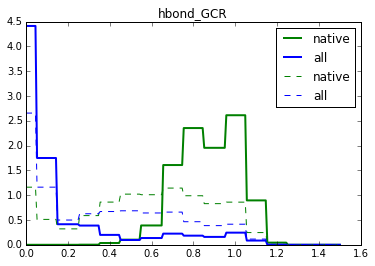

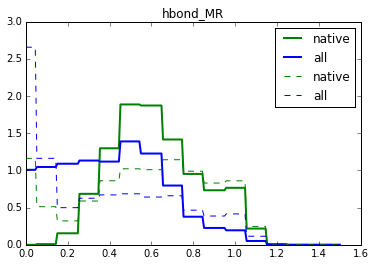

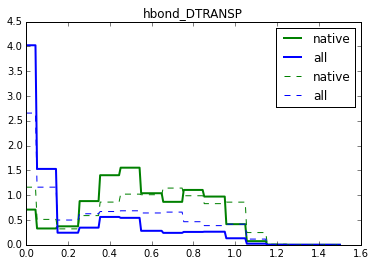

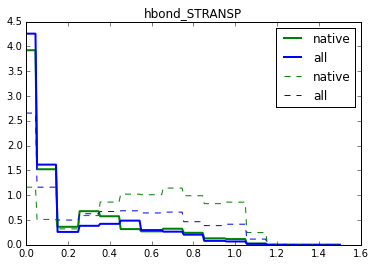

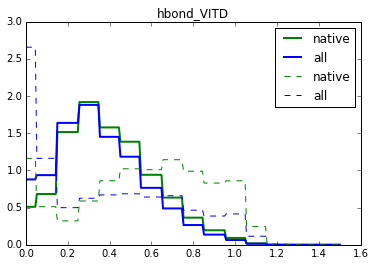

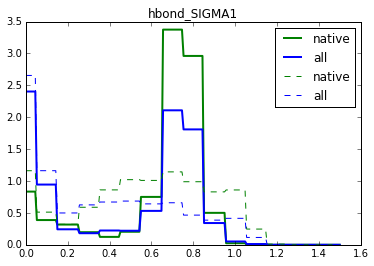

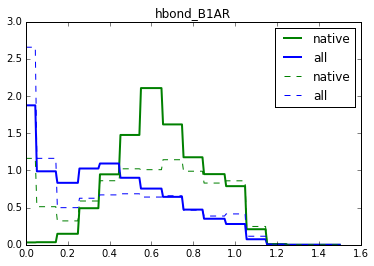

ERROR: GLUT1 hbond


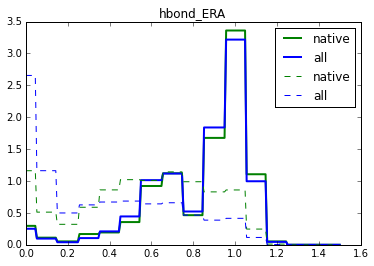

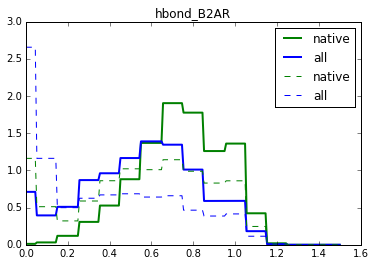

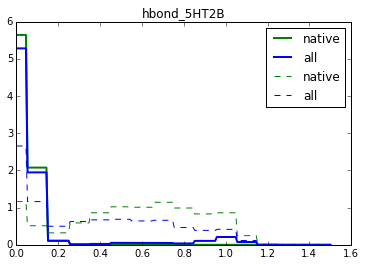

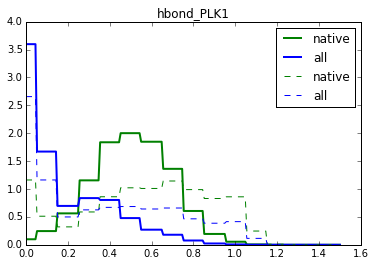

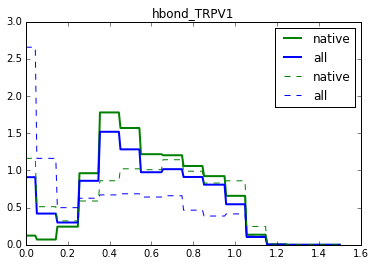

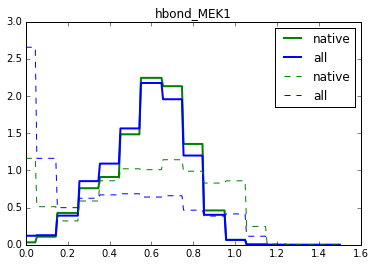

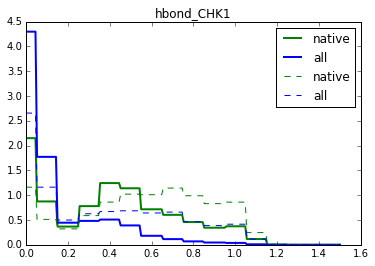

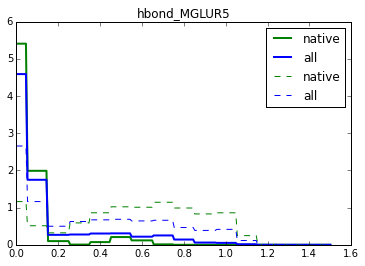

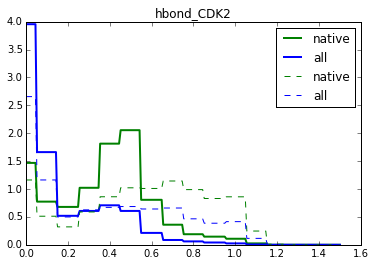

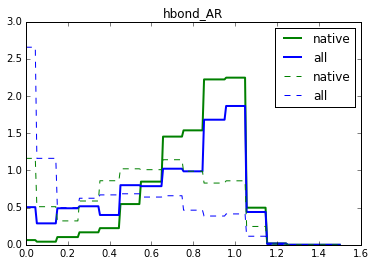

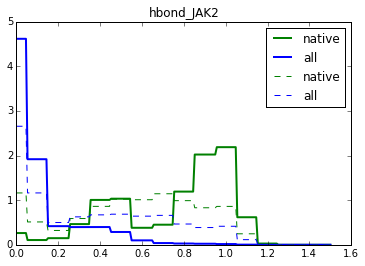

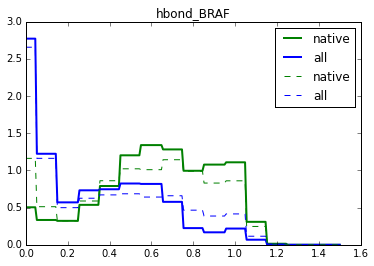

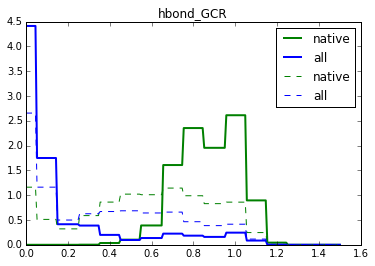

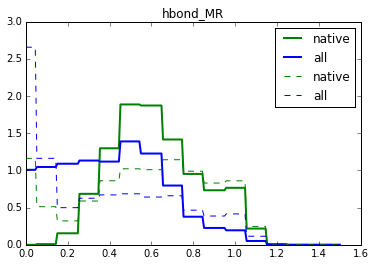

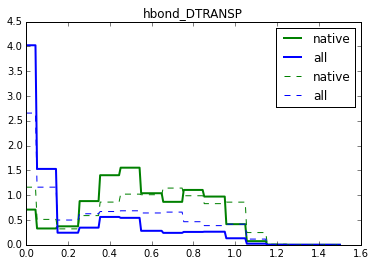

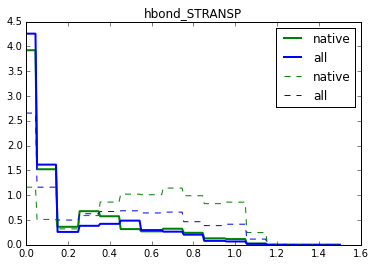

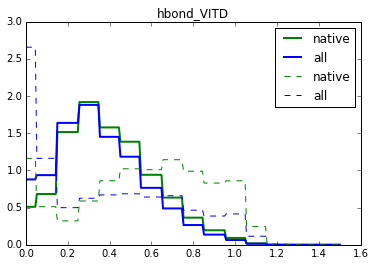

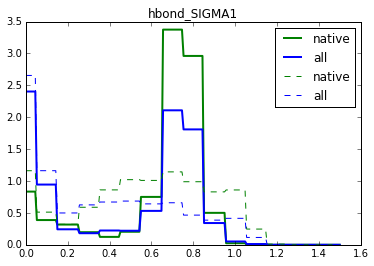

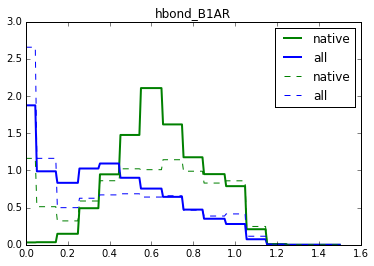

ERROR: GLUT1 hbond


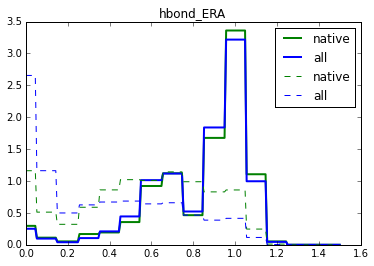

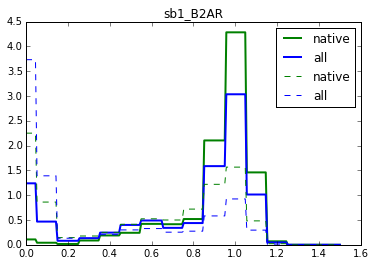

ERROR: 5HT2B sb1


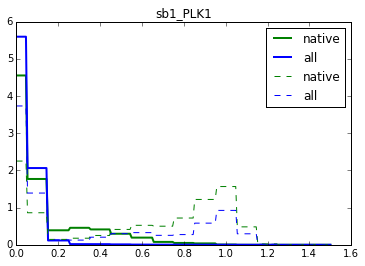

ERROR: TRPV1 sb1
ERROR: MEK1 sb1
ERROR: CHK1 sb1
ERROR: MGLUR5 sb1
ERROR: CDK2 sb1
ERROR: AR sb1
ERROR: JAK2 sb1


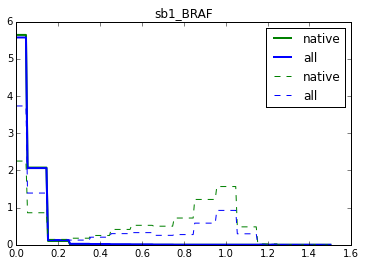

ERROR: GCR sb1
ERROR: MR sb1


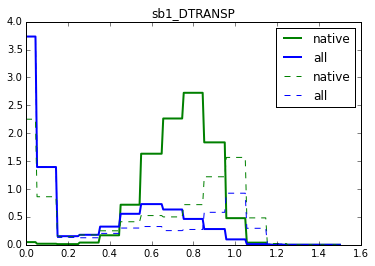

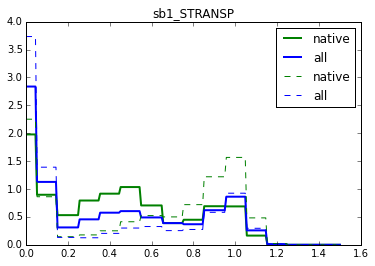

ERROR: VITD sb1


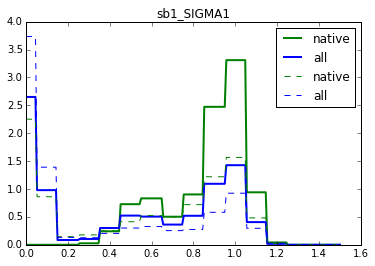

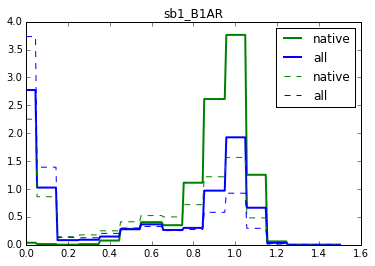

ERROR: GLUT1 sb1


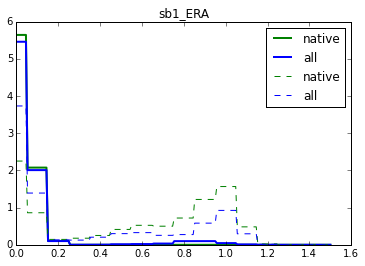

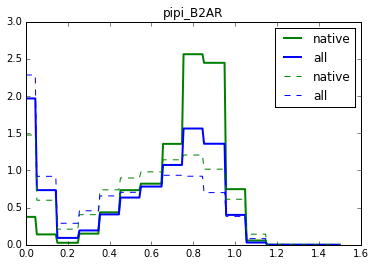

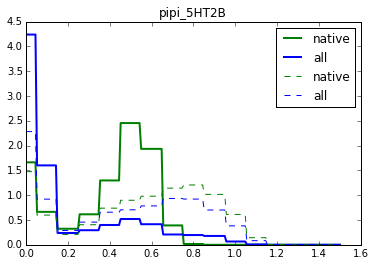

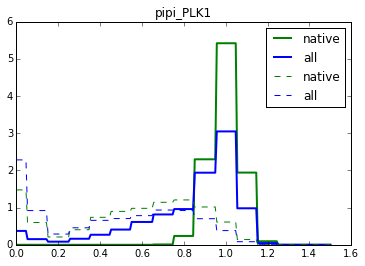

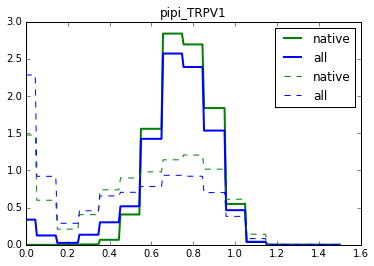

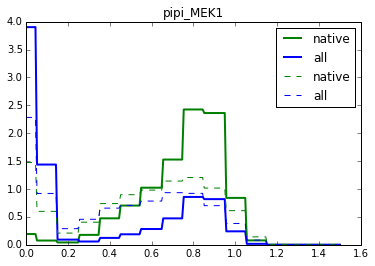

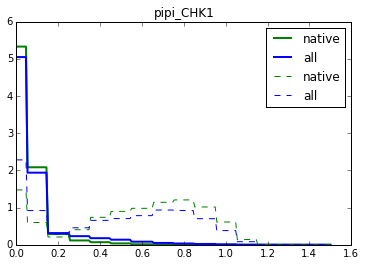

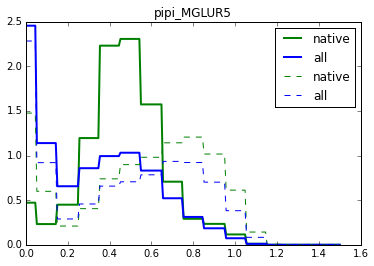

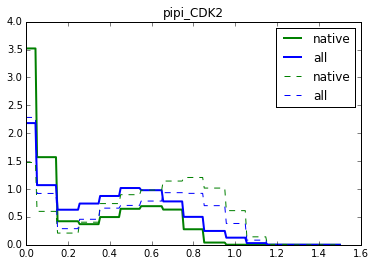

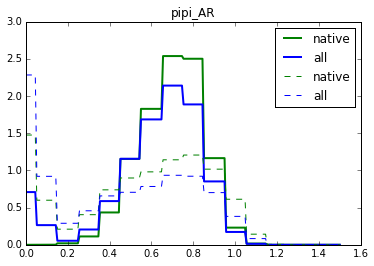

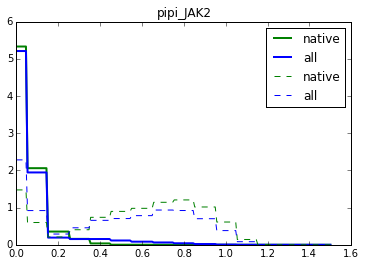

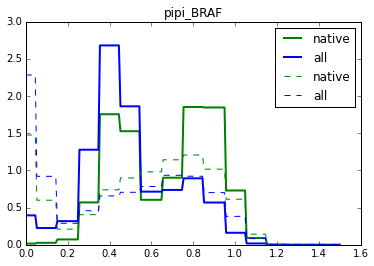

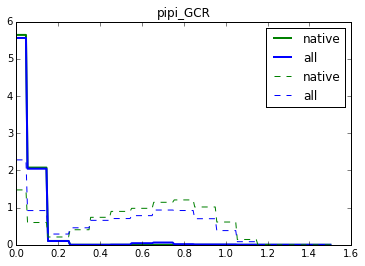

ERROR: MR pipi


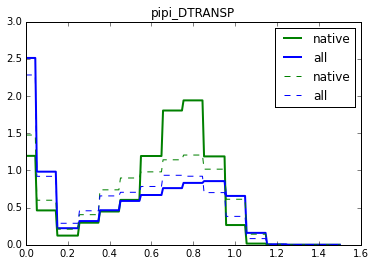

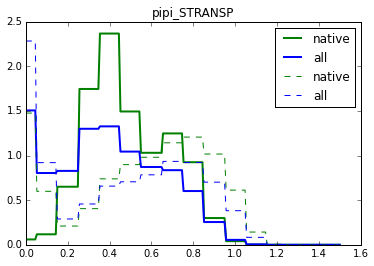

ERROR: VITD pipi


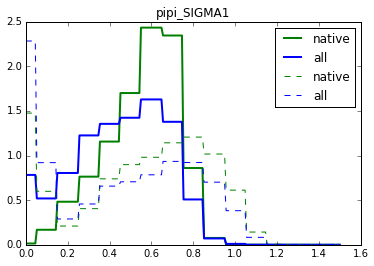

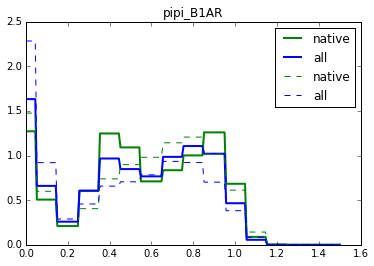

ERROR: GLUT1 pipi


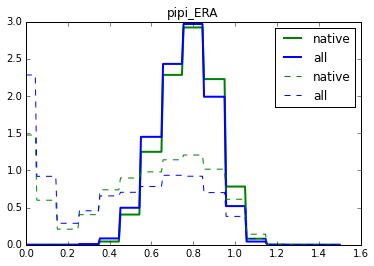

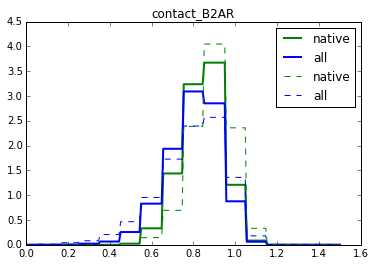

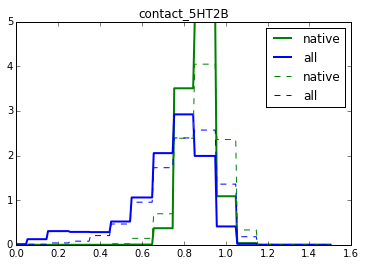

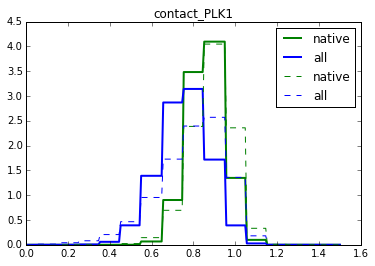

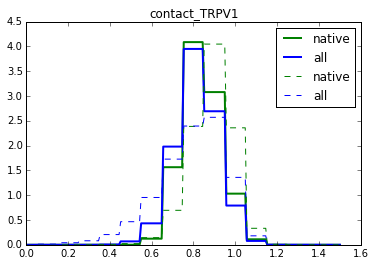

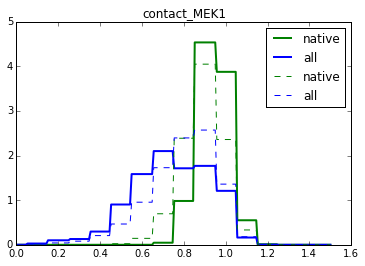

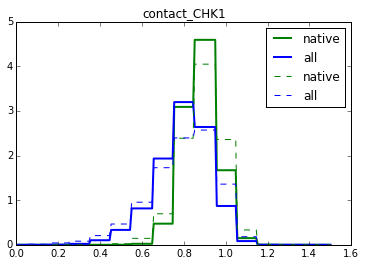

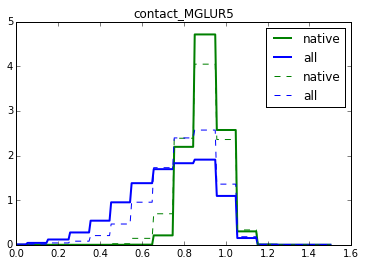

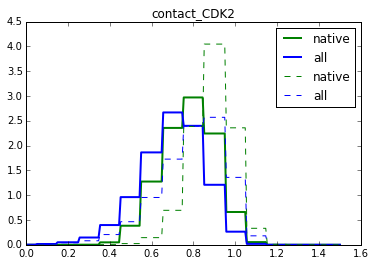

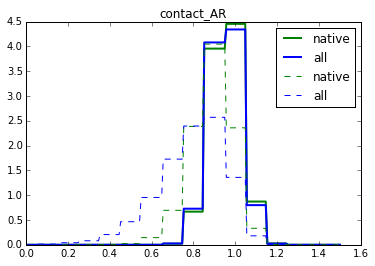

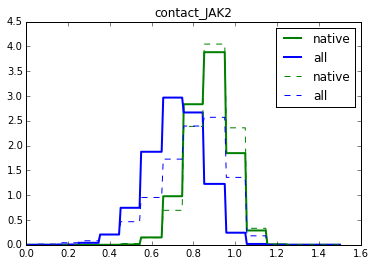

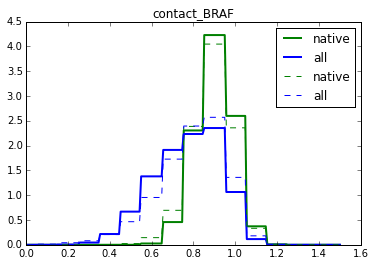

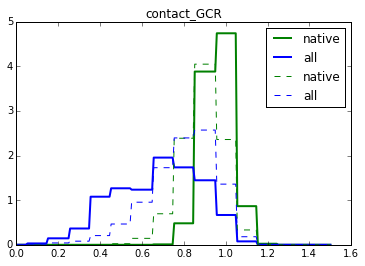

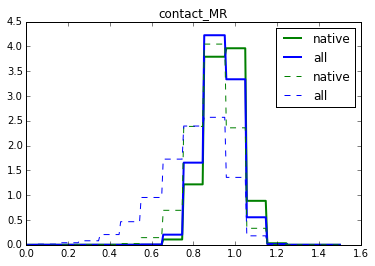

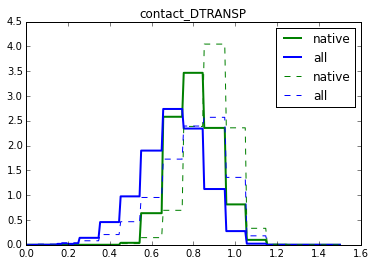

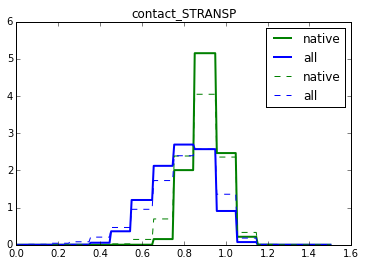

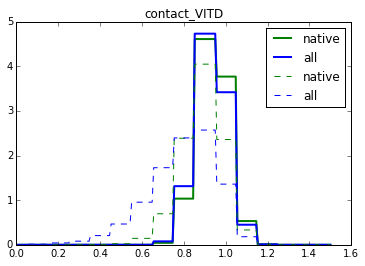

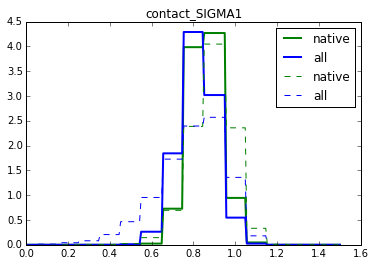

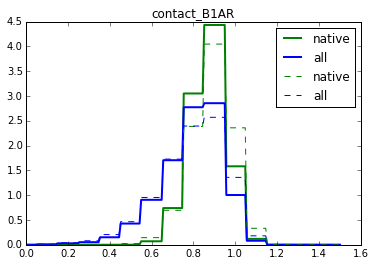

ERROR: GLUT1 contact


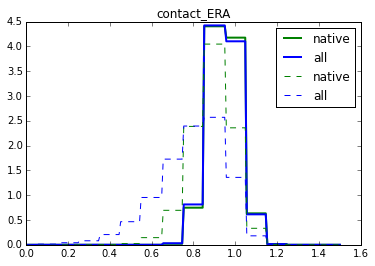

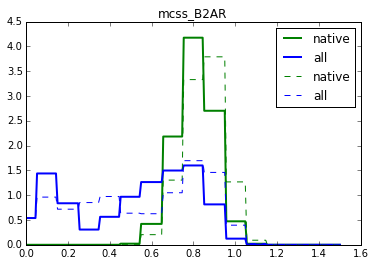

ERROR: 5HT2B mcss
ERROR: PLK1 mcss
ERROR: TRPV1 mcss
ERROR: MEK1 mcss
ERROR: CHK1 mcss
ERROR: MGLUR5 mcss
ERROR: CDK2 mcss
ERROR: AR mcss
ERROR: JAK2 mcss
ERROR: BRAF mcss
ERROR: GCR mcss
ERROR: MR mcss
ERROR: DTRANSP mcss


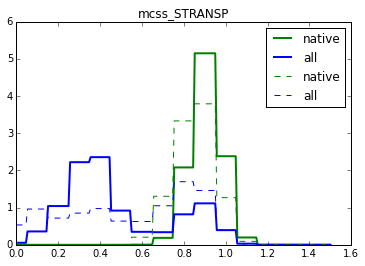

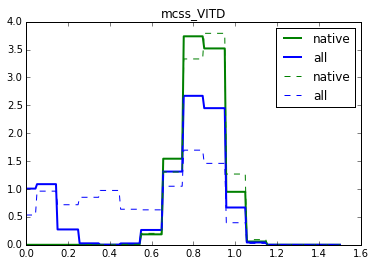

ERROR: SIGMA1 mcss
ERROR: B1AR mcss
ERROR: GLUT1 mcss
ERROR: ERA mcss


In [83]:
for k in k_list:
    for p, prot_stats in alls.proteins.items():
        try:
            plt.plot(x, [prot_stats.dist[native][k].evaluate(i)   for i in x], c='g', lw=2, label='native')
            plt.plot(x, [prot_stats.dist[allposes][k].evaluate(i) for i in x], c='b', lw=2, label='all')

            plt.plot(x, [alls.dist[native][k].evaluate(i)   for i in x], c= 'g', linestyle = '--', label='native')
            plt.plot(x, [alls.dist[allposes][k].evaluate(i) for i in x], c = 'b', linestyle = '--', label='all')
            plt.title(k+'_'+p)
            plt.legend()
            plt.show()
        except:
            print 'ERROR:', p, k

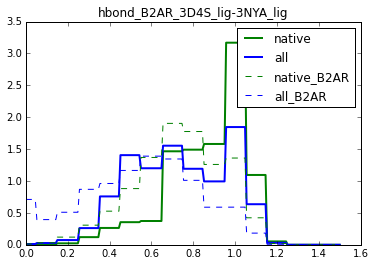

In [ ]:
for k in k_list:
    for p, prot_stats in alls.proteins.items():
        for ligpair, lp in alls.proteins[p].pairs.items():
            try:
                plt.plot(x, [lp.dist[native][k].evaluate(i)   for i in x], c = 'g', lw=2, label='native')
                plt.plot(x, [lp.dist[allposes][k].evaluate(i) for i in x], c = 'b', lw=2, label='all')
                
                plt.plot(x, [prot_stats.dist[native][k].evaluate(i)   for i in x],
                         c = 'g', linestyle='--', label='native_'+p)
                plt.plot(x, [prot_stats.dist[allposes][k].evaluate(i) for i in x],
                         c = 'b', linestyle='--', label='all_'+p)
                plt.title(k+'_'+p+'_'+ligpair[0]+'-'+ligpair[1])
                plt.legend()
                plt.show()
            except:
                print 'ERROR:', p, ligpair, k